## 다이나믹 프로그래밍
다음 환경(**GridWorldEnvironment**)을 가지고 가치 이터레이션, 정책 이터레이션을 구현하세요.

## GridWorldEnvironment
```py
start_point = (0,0)
end_point = (4,4)
gridworld_size = (5,5)
env = GridWorldEnvironment(start_point, end_point, grid_world_size)
```

## Original Code

In [ ]:
import numpy as np
from typing import Tuple

class GridWorldEnvironment:
    def __init__(self, start_point:Tuple, end_point:Tuple, grid_world_size:Tuple):
        # 시작점과 끝점을 받는다.
        self.start_point = start_point
        self.end_point = end_point if end_point != (-1,-1) else (grid_world_size[0] + end_point[0],
                                                                 grid_world_size[1] + end_point[1])

        # 그리드 월드의 규격을 받는다.
        self.width, self.height = grid_world_size

        # action dictionary
        self.action_space = ['up', 'down', 'left', 'right']
        self.num_actions = len(self.action_space)
        self.actions = {'up':(-1,0),
                        'down':(1,0),
                        'left':(0,-1),
                        'right':(0,1) }

        # 상태 : 좌표로 나타남
        self.traces = []

        # total states
        self.total_states = []
        for x in range(self.width):
            for y in range(self.height):
                self.total_states.append((x,y))

        # reward
        self.reward = np.zeros(shape=(self.height, self.width)).tolist()
        self.reward[end_point[0]][end_point[1]] = 1

    def render(self):
        # 그리드 월드의 상태를 출력한다.
        self.grid_world = np.full(shape=(self.height, self.width), fill_value=".").tolist()

        last_point = self.traces[-1] # 에이전트가 가장 마지막에 있었던 위치
        traces = list(set(self.traces)) # 중복된 값을 삭제하기 위함
        for trace in traces:
            self.grid_world[trace[0]][trace[1]] = "X"

        self.grid_world[self.start_point[0]][self.start_point[1]] = "S" # start point
        self.grid_world[self.end_point[0]][self.end_point[1]] = "G" # end point
        self.grid_world[last_point[0]][last_point[1]] = "A" # 현재 에이전트의 위치

        # string으로 출력한다.
        grid = ""

        for i in range(self.height):
            for j in range(self.width):
                grid += self.grid_world[i][j]+" "
            grid += "\n"

        print(grid)

    def get_reward(self, state, action_idx):
        next_state = self.state_after_action(state, action_idx)
        return self.reward[next_state[0]][next_state[1]]

    def state_after_action(self, state, action_idx:int):
        action = self.action_space[action_idx]
        row_movement, col_movement = self.actions[action]

        # action에 따라 에이전트 이동
        next_state = (state[0]+row_movement, state[1]+col_movement)
        next_state = self.check_boundary(next_state)

        return next_state

    def check_boundary(self, state):
        state = list(state)
        state[0] = (0 if state[0] < 0 else self.height - 1 if state[0] > self.height - 1 else state[0])
        state[1] = (0 if state[1] < 0 else self.width - 1 if state[1] > self.width - 1 else state[1])
        return tuple(state)

## Own Code
위 환경 클래스를 상속 받아 `env.render` 코드를 구현하세요.

### 처음에 잘못 구현한 ver.

In [ ]:
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           grid_world_size=(5,5))
env.traces = [(0, 0), (1, 0), (2, 0), (2, 1)]
env.render()

S . . . . 
X . . . . 
X A . . . 
. . . . . 
. . . . G 



In [ ]:
def RENDER(env,ans,total):
    for i in range(Iteration):
        state = env.start_point
        env.traces = []
        num = 0

        if ans == policy:
            ans.policy_evaluation()
            ans.policy_improvement()
        else:
            ans.value_iteration()

        while state != env.end_point:
            action = ans.get_action(state) # 정책에 따라 취할 행동
            if isinstance(action, list):
                action = action[0]  # 여러 개일 경우 첫 번째 행동 선택
            next_state = env.state_after_action(state, action)
            state = next_state
            env.traces.append(state)

            num += 1

        total.append(num)
        print(f"iter: {i+1}    num: {num}" )

        if RENDER_END:
            env.render()

    plt.plot(total)

# 01. 정책 이터레이션
- 스켈레톤 코드  
`init` 부를 제외한 나머지 매소드를 채워주세요.

In [ ]:
class PolicyIteration:
    def __init__(self,env):
        # about env
        self.env = env
        self.action_space = env.action_space # ['up', 'down', 'left', 'right'] 차례대로 (-1,0) (1,0) (0,-1) (0,1)
        self.num_action = len(self.action_space)

        # value 2d list
        self.value_table = np.zeros(shape = (env.height, env.width)).tolist() # Appendix 1

        # 상하좌우 동일한 확률을 가지는 정책으로 초기화
        self.policy_table = np.full(shape = (env.height, env.width, self.num_action), fill_value = 1/self.num_action).tolist()

        # end state 에서는 어떠한 행동도 할 필요가 없어서 policy table을 비운다.
        self.policy_table[env.end_point[0]][env.end_point[1]] = []

        self.gamma = 0.9 # 할인율

    # 상태에 따른 정책 반환
    def get_policy(self, state):
        return self.policy_table[state[0]][state[1]]

    # 가치함수의 값을 반환
    def get_value(self, state):
        return self.value_table[state[0]][state[1]]

    # 특정 상태에서 정책에 따른 행동
    def get_action(self,state):
        policy = self.get_policy(state)
        policy = np.array(policy)
        return np.random.choice(self.num_action, 1, p=policy)[0]

    # 정책 평가
    def policy_evaluation(self):
        # 모든 상태에 대해서 벨만 기대 방정식을 계산
        for state in self.env.total_states:
            value = 0.0
            # 마침 상태의 가치함수 = 0
            if state == self.env.end_point:
                self.value_table[state[0]][state[1]] = value

            else:
                # 벨만 기대 방정식
                for action in range(self.num_action):
                    next_state = self.env.state_after_action(state, action)
                    reward = self.env.get_reward(state, action)
                    next_value = self.get_value(next_state)
                    value += (self.get_policy(state)[action] * (reward + self.gamma * next_value))
                self.value_table[state[0]][state[1]] = value

    # 현재 가치함수에 대해서 탐욕 정책 발전
    def policy_improvement(self):
        next_policy = self.policy_table
        for state in self.env.total_states:
                if state == self.env.end_point:
                    continue

                value_list = []
                # 반환할 정책 초기화
                result = [0.0,0.0,0.0,0.0]

                # 모든 행동에 대해서 [보상 + (할인율*다음 상태 가치함수)] 계산
                for idx in range(self.num_action):
                    next_state = self.env.state_after_action(state,idx)
                    reward = self.env.get_reward(state,idx)
                    next_value = self.get_value(next_state)
                    value = reward + self.gamma * next_value
                    value_list.append(value)

                # 받을 보상이 최대인 행동들에 대해 탐욕 정책 발전
                max_idx_list = np.argwhere(value_list == np.amax(value_list))
                max_idx_list = max_idx_list.flatten().tolist()
                prob = 1/len(max_idx_list)

                for idx in max_idx_list:
                    result[idx] = prob

                next_policy[state[0]][state[1]] = result

        self.policy_table = next_policy

## 정책 이터레이션 실행
정의한 클래스를 이용해 정책 이터레이션을 실행해 주세요.

iter: 1    num: 41
S . . . . 
X . . . . 
X . . . . 
X X . . . 
X X X X A 

iter: 2    num: 17
S X X X . 
X X X X . 
X X X X . 
. X . X . 
. . . X A 

iter: 3    num: 9
S X . . . 
. X X X . 
. . . X . 
. . . X X 
. . . . A 

iter: 4    num: 10
S X X . . 
. . X X X 
. . . . X 
. . . . X 
. . . . A 

iter: 5    num: 9
S . . . . 
X . . . . 
X X X X X 
. . . . X 
. . . . A 

iter: 6    num: 11
S . . . . 
X . . . . 
X X X X X 
. . . . X 
. . . . A 

iter: 7    num: 8
S X . . . 
. X . . . 
. X . . . 
. X . . . 
. X X X A 

iter: 8    num: 8
S . . . . 
X X . . . 
. X X . . 
. . X X X 
. . . . A 

iter: 9    num: 8
S X X X X 
. . . . X 
. . . . X 
. . . . X 
. . . . A 

iter: 10    num: 8
S X X . . 
. . X . . 
. . X . . 
. . X . . 
. . X X A 

iter: 11    num: 8
S . . . . 
X . . . . 
X . . . . 
X . . . . 
X X X X A 

iter: 12    num: 8
S . . . . 
X . . . . 
X . . . . 
X X X . . 
. . X X A 

iter: 13    num: 8
S . . . . 
X X X X . 
. . . X X 
. . . . X 
. . . . A 

iter: 14    num: 8
S . . . . 


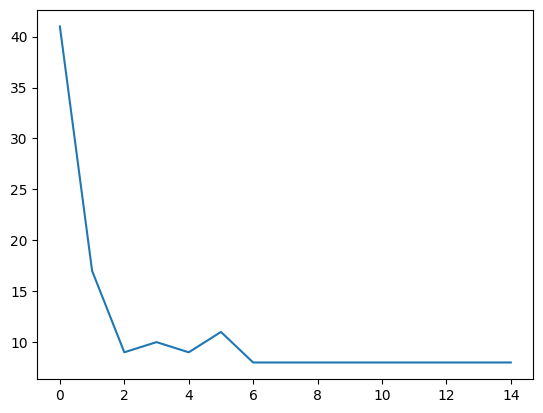

In [ ]:
import matplotlib.pyplot as plt
Iteration = 15
RENDER_END = True
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           grid_world_size=(5,5))
policy = PolicyIteration(env)
end_point = env.end_point
total = []
RENDER(env, policy,total)

## 학습에서 중요한 정보
학습이 되고 있는 것을 판단할 수 있는 파라미터를 찾아 시각화해 주세요.

# 02. 가치 이터레이션
- 스켈레톤 코드  
`init` 부를 제외한 나머지 매소드를 채워주세요.

In [ ]:
class ValueIteration:
    def __init__(self, env):

        self.env = env
        self.action_space = env.action_space
        self.num_actions = env.num_actions

        # value 2d list
        self.value_table = np.zeros(shape=(env.height, env.width)).tolist()

        self.gamma = 0.9 # 할인율

    def value_iteration(self):
        # 모든 상태에 대해서 벨만 최적방정식을 계산
        for state in self.env.total_states:
            # 마침 상태의 가치함수 = 0
            if state == self.env.end_point:
                self.value_table[state[0]][state[1]] = 0.0
            else:
                # 벨만 최적 방정식
                value_list = []
                for action in range(self.num_actions):
                    next_state = self.env.state_after_action(state, action)
                    reward = self.env.get_reward(state, action)
                    next_value = self.get_value(next_state)
                    value_list.append((reward + self.gamma * next_value))

                # 최댓값을 다음 가치함수로 대입
                self.value_table[state[0]][state[1]] = max(value_list)

    def get_action(self, state):
        if state == self.env.end_point:
            return []
        else:# 모든 행동에 대해 큐함수 (보상 + (할인율 * 다음 상태 가치함수))를 계산
             value_list = []
             for idx in range(self.num_actions):
                 next_state = self.env.state_after_action(state, idx)
                 reward = self.env.get_reward(state, idx)
                 next_value = self.get_value(next_state)
                 value = (reward + self.gamma * next_value)
                 value_list.append(value)

             # 최대 큐함수를 가진 행동(복수일 경우 여러 개)를 반환
             max_idx_list = np.argwhere(value_list == np.amax(value_list))
             action_list = max_idx_list.flatten().tolist()
             action_idx = np.random.choice(action_list) # 왜 이걸 추가해야 하는지 생각해보기
             return action_idx

    def get_value(self, state):
        return self.value_table[state[0]][state[1]]

## 가치 이터레이션 실행
정의한 클래스를 이용해 정책 이터레이션을 실행해 주세요.

iter: 1    num: 34
S X X X X 
. . X X X 
. . X X . 
. . . X X 
. . . . A 

iter: 2    num: 11
S . . . . 
X . X . . 
X X X . . 
. . X X . 
. . . X A 

iter: 3    num: 16
S X . . . 
X X . . . 
. X . . . 
. X X . . 
. . X X A 

iter: 4    num: 17
S X . . . 
X . . . . 
X X . . . 
. X X . . 
. . X X A 

iter: 5    num: 9
S . . . . 
X . . . . 
X . . . . 
X X . . . 
. X X X A 

iter: 6    num: 8
S X X . . 
. . X . . 
. . X . . 
. . X X . 
. . . X A 

iter: 7    num: 8
S . . . . 
X X . . . 
. X X . . 
. . X X X 
. . . . A 

iter: 8    num: 8
S X X X . 
. . . X X 
. . . . X 
. . . . X 
. . . . A 

iter: 9    num: 8
S . . . . 
X . . . . 
X X X X X 
. . . . X 
. . . . A 

iter: 10    num: 8
S X . . . 
. X . . . 
. X X . . 
. . X . . 
. . X X A 

iter: 11    num: 8
S X X X . 
. . . X X 
. . . . X 
. . . . X 
. . . . A 

iter: 12    num: 8
S X . . . 
. X . . . 
. X . . . 
. X . . . 
. X X X A 

iter: 13    num: 8
S X . . . 
. X . . . 
. X X X . 
. . . X . 
. . . X A 

iter: 14    num: 8
S . . . . 


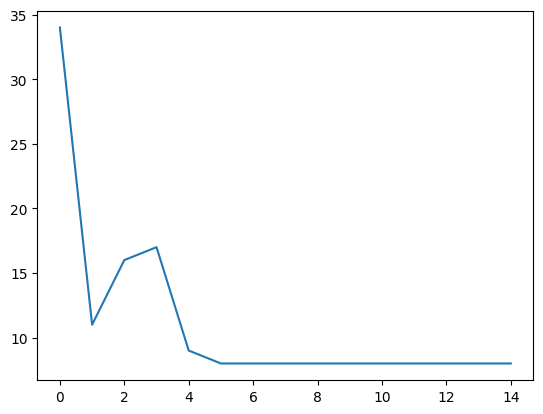

In [ ]:
iter = 5
env = GridWorldEnvironment(start_point=(0,0),
                           end_point=(4,4),
                           grid_world_size=(5,5))
RENDER_END = True
value = ValueIteration(env)
end_point = env.end_point
total = []

RENDER(env, value, total)

## 학습에서 중요한 정보
학습이 되고 있는 것을 판단할 수 있는 파라미터/요소를 찾아 시각화해 주세요.